# Intro

Esse notebook visa explorar os dados disponíveis pelo dataset [Brazilian E-Commerce Public Dataset by Olist](https://www.kaggle.com/olistbr/brazilian-ecommerce)

Além de explorar, houve um *experimento* para tentar identificar qual foi a Nota de satisfação, dada pelo usuário após uma compra, com base no que o usuário escreveu. 

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

%matplotlib inline

In [2]:
path = os.path.join(os.getcwd(),'datasets')
reviews = pd.read_csv(os.path.join(path, 'olist_order_reviews_dataset.csv'))
reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


# Outras informações


Há mais arquivos com algumas outras informações que podem ser de grande valor para um futuro `Feature Engineering`. Vejamos a relação dos bancos

![Relação dos Bancos](https://i.imgur.com/HRhd2Y0.png)

## olist_orders_dataset apresenta se um produto foi enviado e quanto tempo demorou para ser entregue. Essa informaçao pode ser importante

In [3]:
orders = pd.read_csv(os.path.join(path, 'olist_orders_dataset.csv'))
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


# Por enquanto, não me interessa quem comprou. Aqui, estou curioso sobre quanto tempo demorou para ser entregue

In [4]:
columns_to_stay = ['order_id','order_delivered_carrier_date', 'order_delivered_customer_date']
orders = orders[columns_to_stay]
orders.head()

,order_id,order_delivered_carrier_date,order_delivered_customer_date
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-04 19:55:00,2017-10-10 21:25:13
1,53cdb2fc8bc7dce0b6741e2150273451,2018-07-26 14:31:00,2018-08-07 15:27:45
2,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 13:50:00,2018-08-17 18:06:29
3,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-22 13:39:59,2017-12-02 00:28:42
4,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-14 19:46:34,2018-02-16 18:17:02


# Já que a intenção é identificar o valor de review_score através do texto, remover algumas colunas

In [5]:
columns_to_remove = ['review_id']
reviews = reviews.drop(columns_to_remove, axis=1)
reviews.head()

,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


# Data Treatment and Visualization


timestamp e creation_date são do tipo datetime, vamos transforma-los para tal

In [6]:
reviews.dtypes

order_id                   object
review_score                int64
review_comment_title       object
review_comment_message     object
review_creation_date       object
review_answer_timestamp    object
dtype: object

In [7]:
reviews['review_creation_date'] = reviews['review_creation_date'].apply(pd.to_datetime)
reviews['review_answer_timestamp'] = reviews['review_answer_timestamp'].apply(pd.to_datetime)

In [8]:
reviews['review_score'].value_counts()

5    57420
4    19200
1    11858
3     8287
2     3235
Name: review_score, dtype: int64

## Quantos NaN existem nessas colunas

In [9]:
print(
    reviews['review_comment_title'].isna().sum(),
    reviews['review_comment_message'].isna().sum()
)

88285 58247


In [10]:
def nan_to_empty_string(row):
    if row is np.NaN:
        row = ''.strip()
    else:
        pass
    return row

reviews['review_comment_title'] = reviews['review_comment_title'].apply(nan_to_empty_string)
reviews['review_comment_message'] = reviews['review_comment_message'].apply(nan_to_empty_string)

## Mesmo processo para orders

In [11]:
orders.dtypes

order_id                         object
order_delivered_carrier_date     object
order_delivered_customer_date    object
dtype: object

In [12]:
orders['order_delivered_carrier_date'] = orders['order_delivered_carrier_date'].apply(pd.to_datetime)
orders['order_delivered_customer_date'] = orders['order_delivered_customer_date'].apply(pd.to_datetime)

# Um pouco de Feature Engineering

Criando outras colunas para poder relacionar com o dataset de reviews e conseguir plotar um gráfico com as informações

In [13]:
orders['Time waiting'] = orders['order_delivered_customer_date'] - orders['order_delivered_carrier_date']
orders['Time waiting'] = orders['Time waiting'].apply(lambda x: x.total_seconds())

orders = orders.drop(['order_delivered_customer_date', 'order_delivered_carrier_date'], axis=1)

In [14]:
orders['Time waiting'].isna().sum()

2966

## Criando uma coluna com o timestamp entre o pedido de review e a realização do review pelo usuario

In [15]:
reviews['review timestamp'] = reviews['review_answer_timestamp'] - reviews['review_creation_date']
reviews['review timestamp'] = reviews['review timestamp'].apply(lambda x: x.total_seconds())

reviews = reviews.drop(['review_answer_timestamp', 'review_creation_date'], axis=1)

In [16]:
reviews['review timestamp'].isna().sum()

0

## Criando uma coluna com as features textuais

com uma coluna que ja une duas outras, não preciso mais dessas duas

In [17]:
def join_text(row):
    return '{} {}'.format(
        row['review_comment_title'],
        row['review_comment_message'])

reviews['review'] = reviews[['review_comment_title','review_comment_message']].apply(join_text, axis=1)
reviews = reviews.drop(['review_comment_title','review_comment_message'], axis=1)

In [18]:
orders.head()

,order_id,Time waiting
0,e481f51cbdc54678b7cc49136f2d6af7,523813.0
1,53cdb2fc8bc7dce0b6741e2150273451,1040205.0
2,47770eb9100c2d0c44946d9cf07ec65d,792989.0
3,949d5b44dbf5de918fe9c16f97b45f8a,816523.0
4,ad21c59c0840e6cb83a9ceb5573f8159,167428.0


In [19]:
print(
    orders.shape,
    reviews.shape
)

(99441, 2) (100000, 4)


### Como é mostrado acima, há mais informações de reviews que há de orders. Eu quero somente os registros que possuem informações de order. 

In [20]:
review_merge = reviews.merge(
    orders,
    how='inner',
    on='order_id'
)

review_merge.head()

,order_id,review_score,review timestamp,review,Time waiting
0,73fc7af87114b39712e6da79b0a377eb,4,78419.0,,420319.0
1,a548910a1c6147796b98fdf73dbeba33,5,97513.0,,619745.0
2,f9e4b658b201a9f2ecdecbb34bed034b,5,138984.0,,868220.0
3,658677c97b385a9be170737859d3511b,5,79326.0,Recebi bem antes do prazo estipulado.,845028.0
4,8e6bfb81e283fa7e4f11123a3fb894f1,5,124013.0,Parabéns lojas lannister adorei comprar pela ...,1112241.0


## Há produtos que não possuem registros da entrega para o cliente. Vamos analisar como reagem os usuários

In [21]:
sem_data_entrega = review_merge[review_merge['Time waiting'].isna()]
sem_data_entrega.head()

,order_id,review_score,review timestamp,review,Time waiting
19,583174fbe37d3d5f0d6661be3aad1786,1,15037.0,Não chegou meu produto Péssimo,NaN
69,97d2f8fe76f2f253b8291e17b5383884,1,915043.0,O produto não chegou no prazo estipulado e ca...,NaN
90,a2714ecbf6eeb3bb9cd7dba6dc1c5e82,1,44854.0,Pedi reembolso e sem resposta até momento,NaN
105,96b947c986b42f213c9e6b8ccccedb89,3,75221.0,Não recebi o produto.,NaN
170,2e5dc86c8c4aa663549caf5e31de840d,1,325512.0,fiz minha compra faz 30 dias e não recebi ain...,NaN


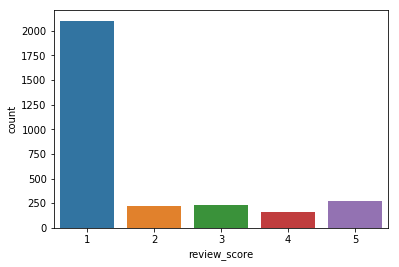

In [22]:
sns.countplot(sem_data_entrega['review_score'])

## Para tratar os dados faltantes nessa coluna, utilizarei a média do dataset como valor. 

In [23]:
media_time_waiting = review_merge['Time waiting'].mean()
review_merge['Time waiting'].fillna(media_time_waiting, inplace=True)

In [24]:
review_merge['Time waiting'].isna().sum()

0

In [25]:
review_merge.head()

,order_id,review_score,review timestamp,review,Time waiting
0,73fc7af87114b39712e6da79b0a377eb,4,78419.0,,420319.0
1,a548910a1c6147796b98fdf73dbeba33,5,97513.0,,619745.0
2,f9e4b658b201a9f2ecdecbb34bed034b,5,138984.0,,868220.0
3,658677c97b385a9be170737859d3511b,5,79326.0,Recebi bem antes do prazo estipulado.,845028.0
4,8e6bfb81e283fa7e4f11123a3fb894f1,5,124013.0,Parabéns lojas lannister adorei comprar pela ...,1112241.0


## Seria interessante ver a relação entre o tamanho do review com a nota atribuida

In [47]:
review_merge['review len'] = review_merge['review'].apply(lambda x: len(x.strip()))
review_merge.head()

,review_score,review timestamp,review,Time waiting,review len
0,4,78419.0,,420319.0,0
1,5,97513.0,,619745.0,0
2,5,138984.0,,868220.0,0
3,5,79326.0,Recebi bem antes do prazo estipulado.,845028.0,37
4,5,124013.0,Parabéns lojas lannister adorei comprar pela ...,1112241.0,100


In [27]:
review_merge.drop('order_id', axis=1, inplace=True)

In [28]:
review_merge['review len'].max()

229

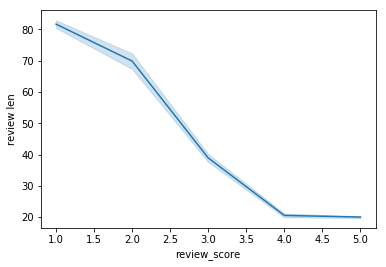

In [29]:
sns.lineplot(y='review len',x='review_score', data=review_merge)

## Gráfico acima mostra que, geralmente, quanto maior o review, menor é a nota

## Correlação entre as features

In [30]:
review_merge.corr()

,review_score,review timestamp,Time waiting,review len
review_score,1.000000,0.007052,-0.281908,-0.398105
review timestamp,0.007052,1.000000,0.007019,-0.001839
Time waiting,-0.281908,0.007019,1.000000,0.087630
review len,-0.398105,-0.001839,0.087630,1.000000


# Gráficos

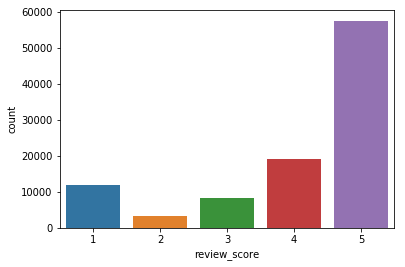

In [31]:
sns.countplot(review_merge['review_score'])

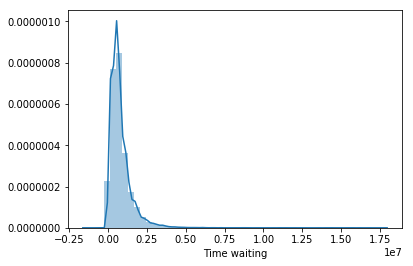

In [32]:
sns.distplot(review_merge['Time waiting'])

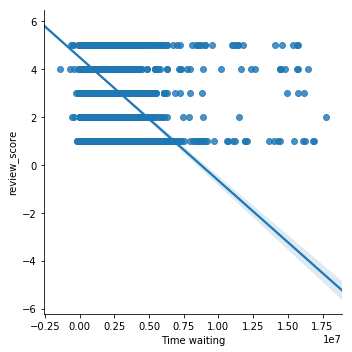

In [33]:
sns.lmplot(x='Time waiting', y='review_score',data= review_merge)

## Gráfico acima mostra que o review tende a ser menor quanto maior o tempo de espera pelo produto

# Agora vamos partir para o ML

In [91]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import FunctionTransformer, Normalizer
from nltk.corpus import stopwords

In [35]:
review_merge.head()

,review_score,review timestamp,review,Time waiting,review len
0,4,78419.0,,420319.0,0
1,5,97513.0,,619745.0,0
2,5,138984.0,,868220.0,0
3,5,79326.0,Recebi bem antes do prazo estipulado.,845028.0,37
4,5,124013.0,Parabéns lojas lannister adorei comprar pela ...,1112241.0,100


# Pré-processamento

Uma vez que eu tenho um dataset que mistura dados textuais com numéricos, eu preciso tratá-los para que o algoritmo selecionado possa recebe-los.


Para isso, definirei dois métodos que retornam as features numéricas e a textual, respectivamente. Depois, utilizarei o `FunctionTransformer` para transformar as minhas funções em um `Transformer` do Scikit

In [114]:
def _get_numeric(data):
    return data[['Time waiting', 'review len']]
    
def _get_text(data):
    return data[['review']].apply(lambda x: ''.join(x), axis=1)


get_numeric = FunctionTransformer(_get_numeric, validate=False)
get_text = FunctionTransformer(_get_text, validate=False)

In [115]:
get_numeric.transform(review_merge.head())

,Time waiting,review len
0,420319.0,0
1,619745.0,0
2,868220.0,0
3,845028.0,37
4,1112241.0,100


In [116]:
get_text.transform(review_merge.head())

0                                                     
1                                                     
2                                                     
3                Recebi bem antes do prazo estipulado.
4     Parabéns lojas lannister adorei comprar pela ...
dtype: object

**Agora que essas funções são um `transformer` do scikit, posso utilizá-las no Pipeline e no FeatureUnion**


Nas funcionalidades numéricas, realizarei a normalização dos dados. Essa prática já seria boa em diversas situações, uma vez que essas `features` possuem um range muito diverso. Na aplicação do algoritmo de KNN, a normalização é um passo bem aceito, uma vez que o algoritmo pode ficar enviesado com `features` que tenham valores numéricos mais altos

In [117]:
from sklearn.naive_bayes import MultinomialNB

In [118]:
TOKEN_PATTERN = r'\w+'

numeric_pipeline = Pipeline([
    ('selector', get_numeric),
    ('scaler', Normalizer())
])

text_pipeline = Pipeline([
    ('selector', get_text),
    ('tfidf', TfidfVectorizer(
        lowercase=True,
        ngram_range=(1,2),
        token_pattern=TOKEN_PATTERN,
        stop_words=stopwords.words('portuguese'))),
    ('dim_reduction', SelectKBest(chi2, k=300))
])

final_pipe = Pipeline([
    ('feature_union', FeatureUnion(transformer_list=[
        ('numeric', numeric_pipeline),
        ('text', text_pipeline)
    ])),
    ('sgd', SGDClassifier(max_iter=100, tol=0.001))
])

In [119]:
NUMERO_OBS = 100000
X = review_merge.drop('review_score', axis=1)[:NUMERO_OBS]
y = review_merge['review_score'].tolist()[:NUMERO_OBS]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    stratify=y,
    shuffle=True,
    test_size=0.3
)
final_pipe.fit(X_train, y_train)
predicted = final_pipe.predict(X_test)
print(classification_report(y_test, predicted))

             precision    recall  f1-score   support

          1       0.61      0.61      0.61      3557
          2       0.00      0.00      0.00       971
          3       0.38      0.00      0.01      2486
          4       0.31      0.01      0.01      5760
          5       0.64      0.98      0.78     17226

avg / total       0.53      0.64      0.52     30000



# Avaliação das métricas


Com o uso de 100mil dados, foi possível atingir um total de 54% de *precision*, e 65% de *recall*. O que parece ser bom no geral. Mas deve-se observar que para as categorias **2 e 3** o classificador não se saiu muito bem. 

In [53]:
print("Acurácia de treino: ", final_pipe.score(X_train, y_train))
print("Acurácia de teste: ", final_pipe.score(X_test, y_test))

Acurácia de treino:  0.6429714285714285
Acurácia de teste:  0.6429666666666667


Com base no resultado da Acurácia de treino e teste, printado acima, podemos ver que o classificador não sofre de **Overfitting** e nem de **Underfitting**. 

# Warnings

[UndefinedMetricWarning](https://stackoverflow.com/questions/43162506/undefinedmetricwarning-f-score-is-ill-defined-and-being-set-to-0-0-in-labels-wi)

# Considerações

Poderia utilizar o método `parcial_fit` para melhorar o algortimo SGDClassifier, caso existissem dados demais.

Antes de utilizar o [SGDClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier), utilizei o [KNN](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html). Não recomendo, KNN consumiu muita memória, ao ponto de ser inviável utilizar mais de 15mil observações, enquanto ao utilizar o SGD, foi possível utilizar todo o dataset



# Possíveis Ações para Melhorar o Resultado do Classificador


* Aplicação de **Stemming** nas palavras. Isto é, a redução das palavras a sua forma mais simples. 
* Considerar outra forma de Tokenização das palavras. No meu caso, utilizei apenas a regex definida por **TOKEN_PATTERN = r'\w+'**. 
* Utilizar uma técnica de **Part-of-speech tagging**. 